In [48]:
import sqlite3
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly as pt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn import metrics

In [4]:
your_query = "SELECT * FROM insurance_train"

# With yapısının içerisinde veritabanına bağlanıp, yapı sona erdiğinde bağlantının otomatik olarak kapatılmasını sağlar
with sqlite3.connect('insurance.sqlite') as connection:
    df = pd.read_sql_query(your_query, connection)
connection.close
print(df)

            id  Gender  Age  Driving_License  Region_Code  Previously_Insured  \
0            1    Male   44                1         28.0                   0   
1            2    Male   76                1          3.0                   0   
2            3    Male   47                1         28.0                   0   
3            4    Male   21                1         11.0                   1   
4            5  Female   29                1         41.0                   1   
...        ...     ...  ...              ...          ...                 ...   
381104  381105    Male   74                1         26.0                   1   
381105  381106    Male   30                1         37.0                   1   
381106  381107    Male   21                1         30.0                   1   
381107  381108  Female   68                1         14.0                   0   
381108  381109    Male   46                1         29.0                   0   

       Vehicle_Age Vehicle_

In [6]:
print(df["Gender"])

0           Male
1           Male
2           Male
3           Male
4         Female
           ...  
381104      Male
381105      Male
381106      Male
381107    Female
381108      Male
Name: Gender, Length: 381109, dtype: object


In [8]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB


In [10]:
df[ df.duplicated()]



,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response


In [12]:
df.isnull().sum()


id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

In [23]:
df["Response"]

0         1
1         0
2         1
3         0
4         0
         ..
381104    0
381105    0
381106    0
381107    0
381108    0
Name: Response, Length: 381109, dtype: int64

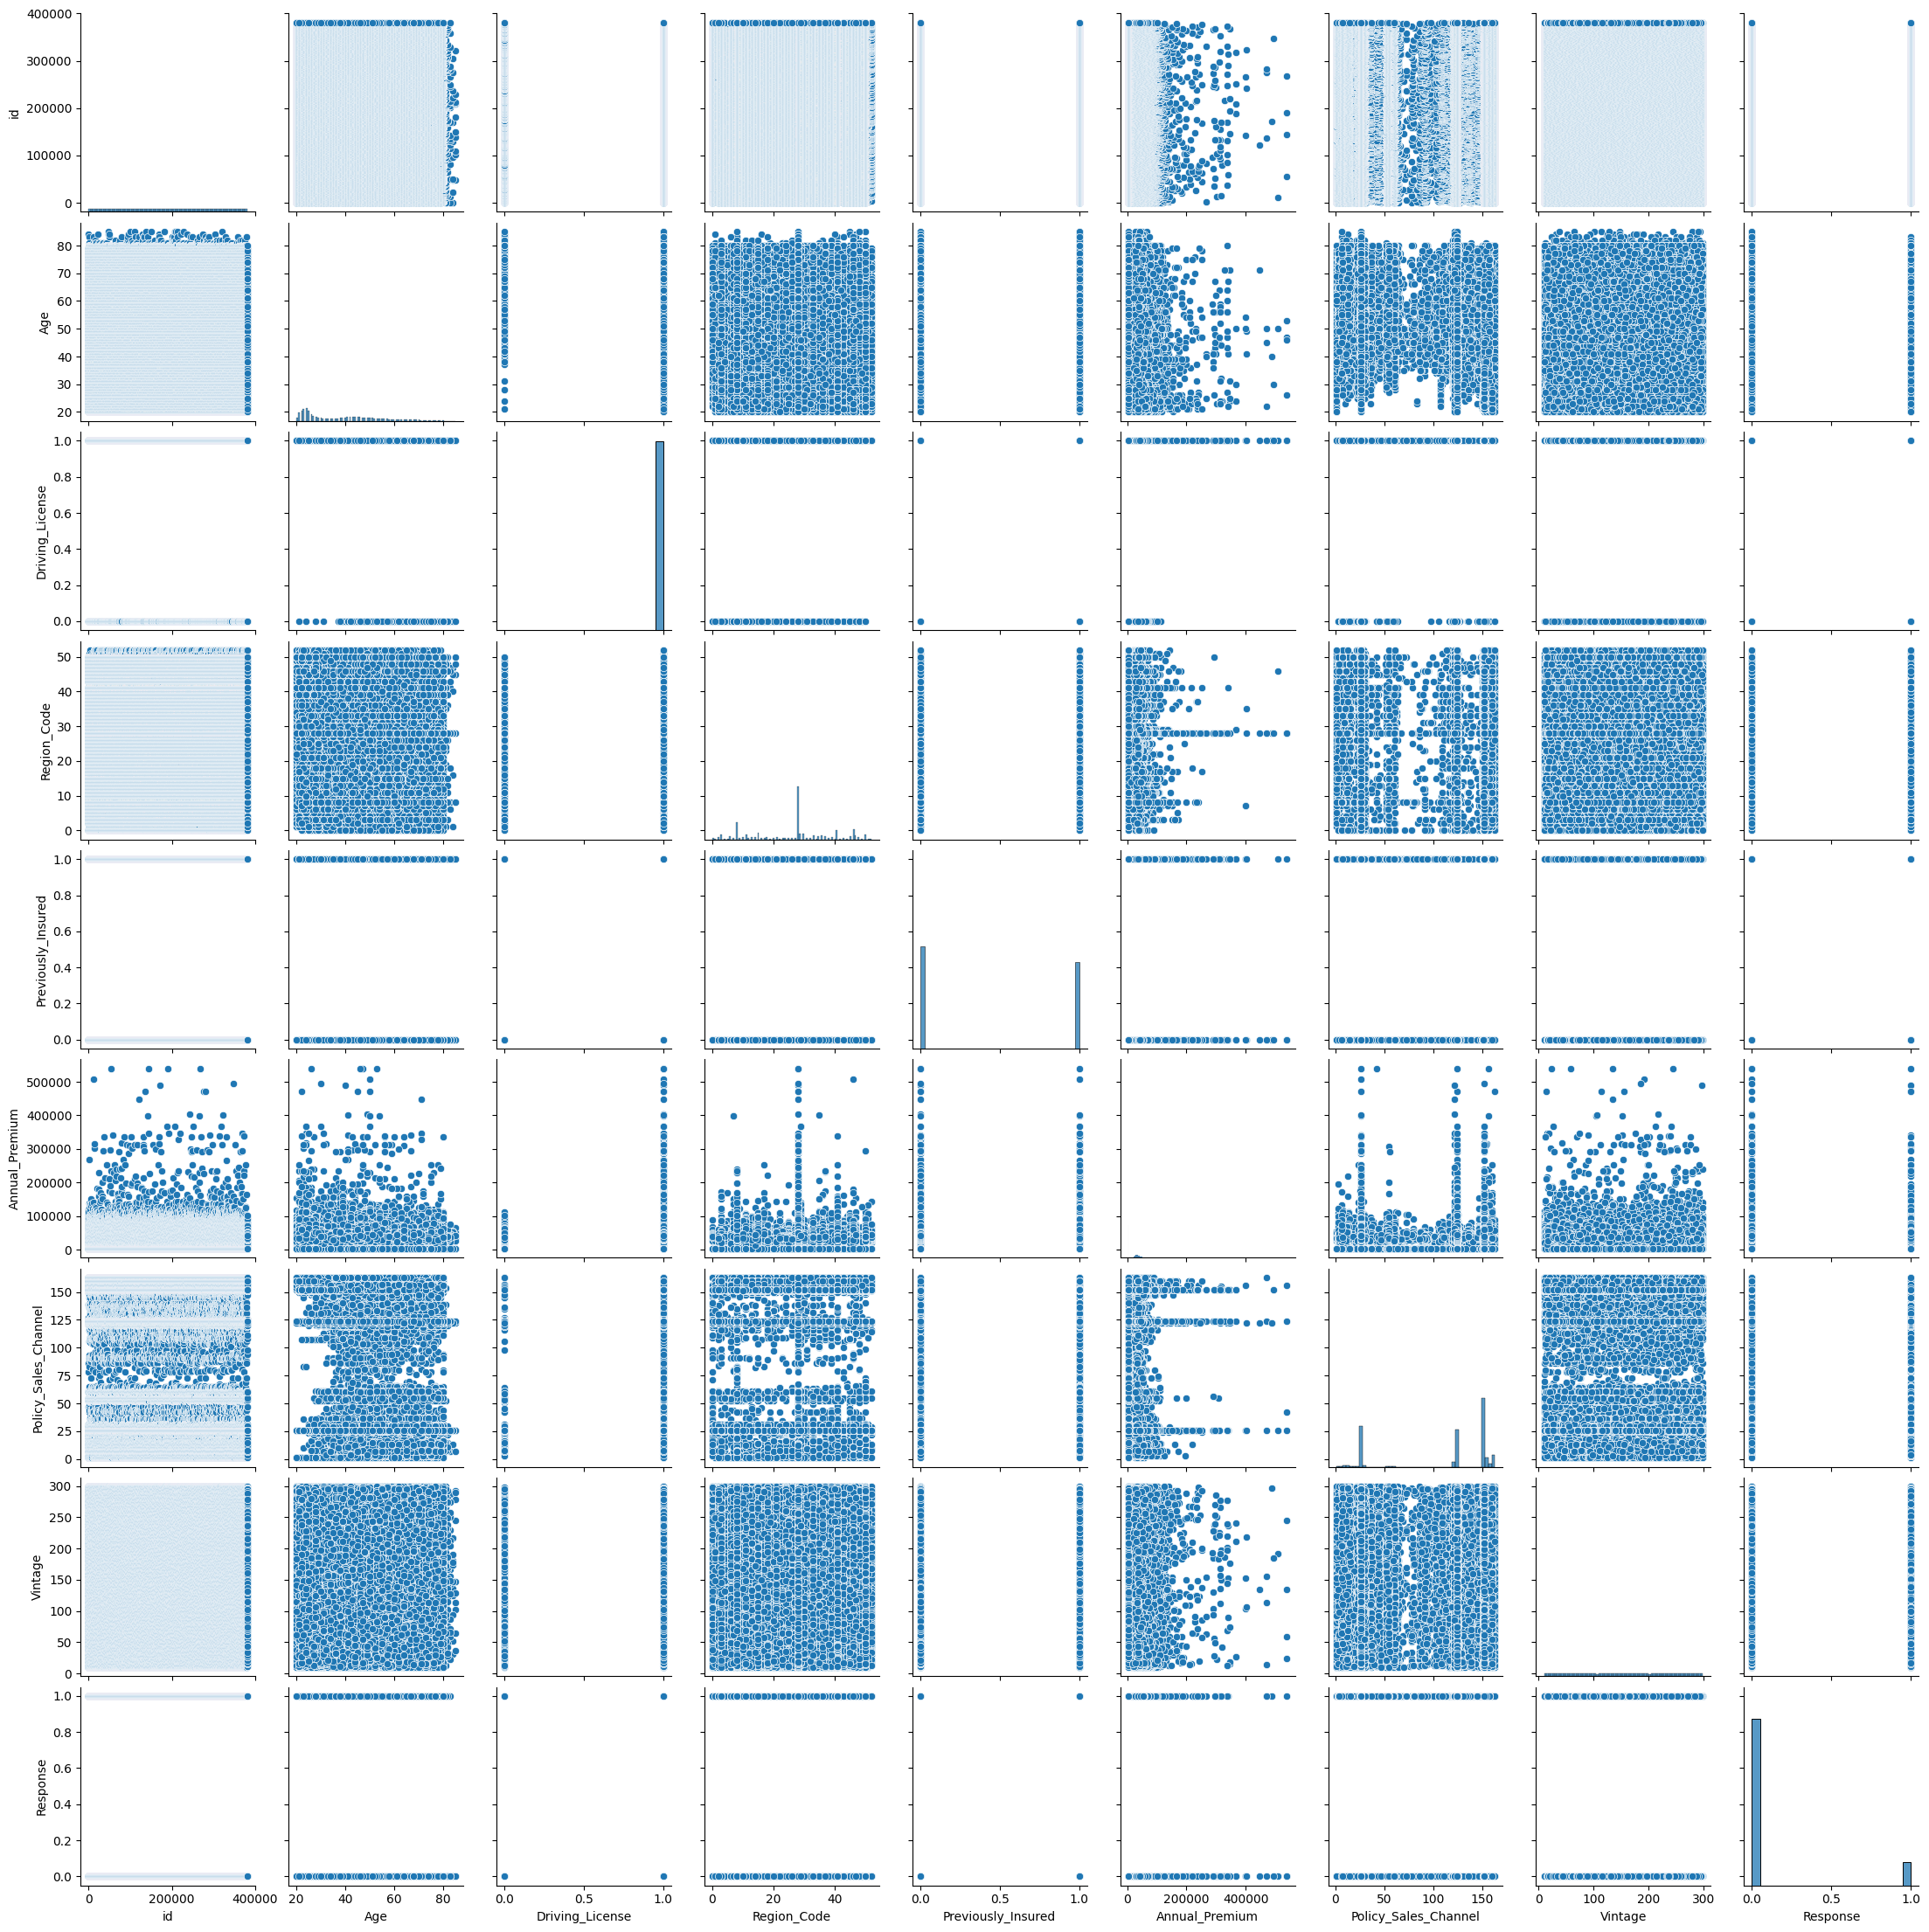

In [15]:
sns.pairplot(df)


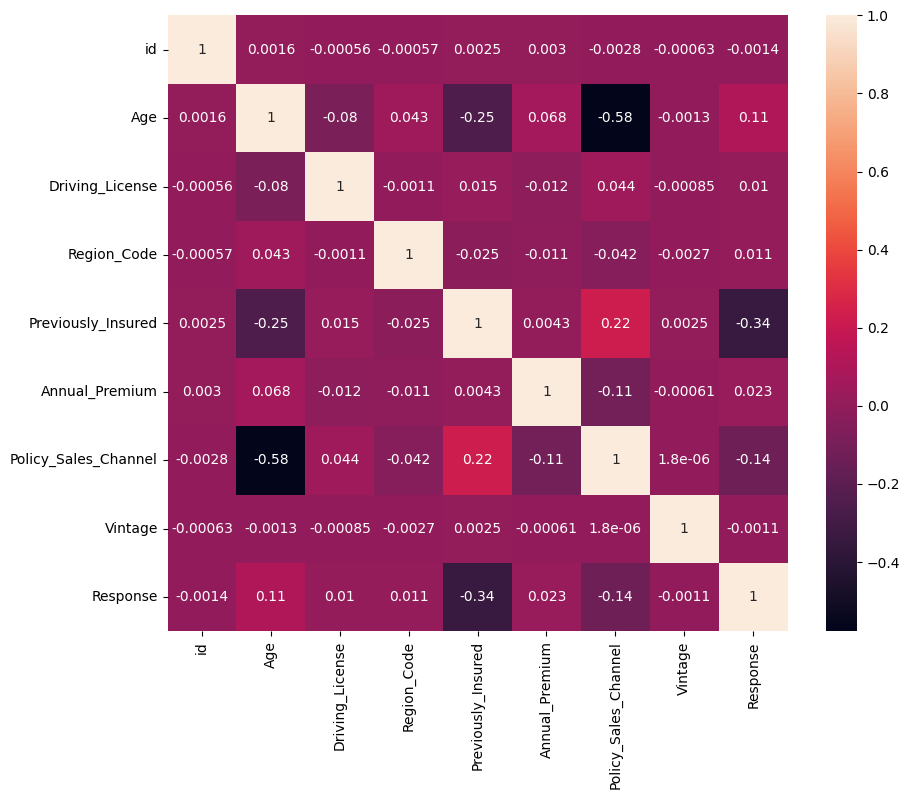

In [22]:
num =['id', 'Age', 'Driving_License', 'Region_Code', 'Previously_Insured', 'Annual_Premium', 'Policy_Sales_Channel', 'Vintage', 'Response']
not_num = ['Gender', 'Vehicle_Age', 'Vehicle_Damage']
plt.figure(figsize=(10,8))
sns.heatmap(df[num].corr(),annot=True)
plt.show()  

In [29]:
print(not_num)

['Gender', 'Vehicle_Age', 'Vehicle_Damage']


In [56]:
data =pd.get_dummies(df, columns=not_num,drop_first=True)
print(data.columns)
print(data)

Index(['id', 'Age', 'Driving_License', 'Region_Code', 'Previously_Insured',
       'Annual_Premium', 'Policy_Sales_Channel', 'Vintage', 'Response',
       'Gender_Male', 'Vehicle_Age_< 1 Year', 'Vehicle_Age_> 2 Years',
       'Vehicle_Damage_Yes'],
      dtype='object')
            id  Age  Driving_License  Region_Code  Previously_Insured  \
0            1   44                1         28.0                   0   
1            2   76                1          3.0                   0   
2            3   47                1         28.0                   0   
3            4   21                1         11.0                   1   
4            5   29                1         41.0                   1   
...        ...  ...              ...          ...                 ...   
381104  381105   74                1         26.0                   1   
381105  381106   30                1         37.0                   1   
381106  381107   21                1         30.0                   1   

<Axes: >

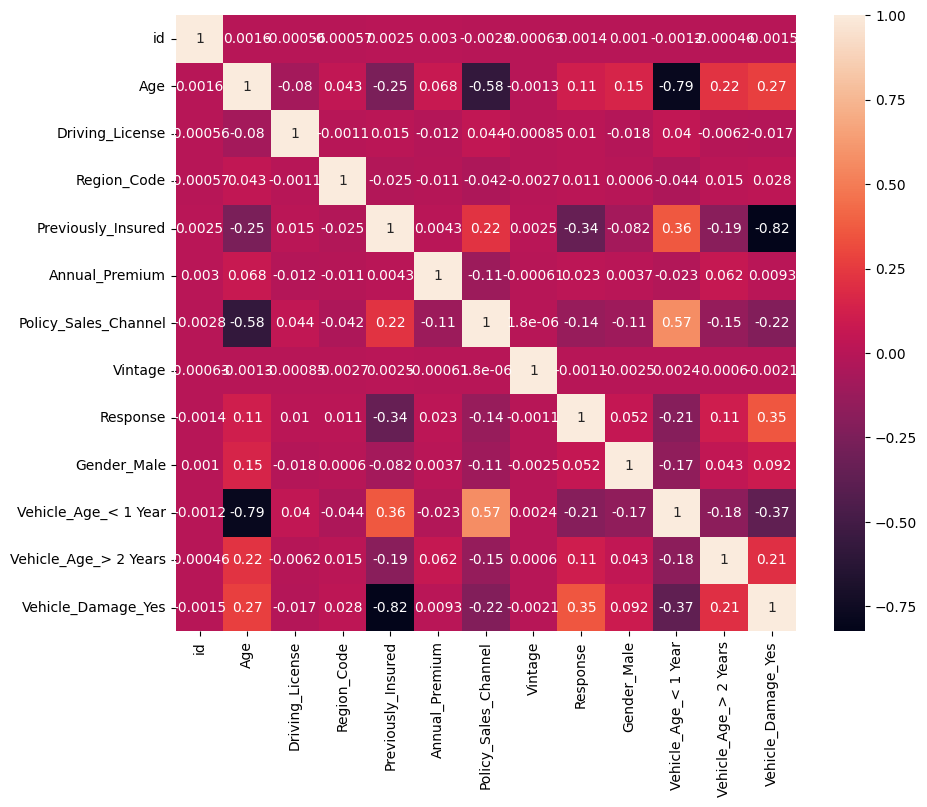

In [30]:
plt.figure(figsize=(10,8))
sns.heatmap(data.corr(),annot=True)

In [37]:
X = data.drop(['Response','id'], axis=1)
y = data['Response']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25 , random_state=1)

In [38]:
# Logistic Regression model
model = LogisticRegression()

# Train the model
model.fit(X_train, y_train)
# predictions 
y_pred = model.predict(X_test)

c:\Users\melih\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 0.8760049539243057
Confusion Matrix:
 [[83246   465]
 [11349   218]]


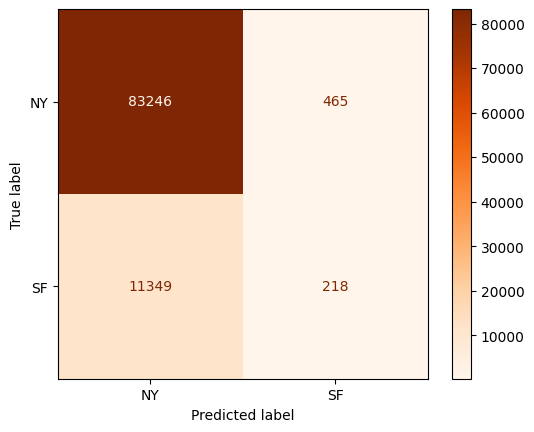

In [45]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Print confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, display_labels=['NY','SF'], cmap='Oranges');

In [53]:
y_test_predict1 = model.predict(X_test)
model_scoreLR = model.score(X_test, y_test)
print(model_scoreLR)
print(metrics.confusion_matrix(y_test, y_test_predict1))
print(metrics.classification_report(y_test, y_test_predict1))

0.8760049539243057
[[83246   465]
 [11349   218]]
              precision    recall  f1-score   support

           0       0.88      0.99      0.93     83711
           1       0.32      0.02      0.04     11567

    accuracy                           0.88     95278
   macro avg       0.60      0.51      0.48     95278
weighted avg       0.81      0.88      0.82     95278



In [46]:
from sklearn.ensemble import RandomForestClassifier

RF_model=RandomForestClassifier(n_estimators=100,random_state=1)
RF_model.fit(X_train, y_train)

RandomForestClassifier(random_state=1)

In [49]:
y_train_predict = RF_model.predict(X_train)
model_score =RF_model.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

0.9998880457333179
[[250681      7]
 [    25  35118]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    250688
           1       1.00      1.00      1.00     35143

    accuracy                           1.00    285831
   macro avg       1.00      1.00      1.00    285831
weighted avg       1.00      1.00      1.00    285831



In [50]:
y_test_predict = RF_model.predict(X_test)
model_scoreRF = RF_model.score(X_test, y_test)
print(model_scoreRF)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.8676504544595814
[[81246  2465]
 [10145  1422]]
              precision    recall  f1-score   support

           0       0.89      0.97      0.93     83711
           1       0.37      0.12      0.18     11567

    accuracy                           0.87     95278
   macro avg       0.63      0.55      0.56     95278
weighted avg       0.83      0.87      0.84     95278



In [51]:
from sklearn.neighbors import KNeighborsClassifier

KNN_model=KNeighborsClassifier()
KNN_model.fit(X_train,y_train)

KNeighborsClassifier()

In [65]:
y_train_predict = KNN_model.predict(X_train)
model_score_KNN = KNN_model.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- Vehicle_Age_greater 1 Year
- Vehicle_Age_lesser 2 Years
Feature names seen at fit time, yet now missing:
- Vehicle_Age_< 1 Year
- Vehicle_Age_> 2 Years


In [61]:
from xgboost import XGBClassifier
X_train.rename

X_train.rename(columns={
    'Vehicle_Age_< 1 Year': 'Vehicle_Age_greater 1 Year',
    'Vehicle_Age_> 2 Years': 'Vehicle_Age_lesser 2 Years',
    'Vehicle_Damage_Yes': 'Vehicle_Damage_Yes'
}, inplace=True)

xgb = XGBClassifier()
xgb.fit(X_train, y_train)
model_score_xgb=xgb.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

0.884757076734154
[[246961   3727]
 [ 29213   5930]]
              precision    recall  f1-score   support

           0       0.89      0.99      0.94    250688
           1       0.61      0.17      0.26     35143

    accuracy                           0.88    285831
   macro avg       0.75      0.58      0.60    285831
weighted avg       0.86      0.88      0.85    285831



In [64]:
models = pd.DataFrame({'xgboost': [model_score_xgb], 'RandomForeset': [model_scoreRF],'KNN':[model_score_KNN],"LogisticRegression":[model_scoreLR]})

NameError: name 'model_score_KNN' is not defined

In [ ]:
from pycaret.classification import setup, compare_models, create_model, evaluate_model

setup = setup(df, target='is_canceled', train_size=0.8, fold=5)

In [66]:
compare_models(sort='F1')

NameError: name 'compare_models' is not defined

In [ ]:
#hata verdi bakılacak yarın